In [1]:
import math
import numpy
import matplotlib.pyplot as plt
from numpy import genfromtxt
dubinsData = genfromtxt("D:\\Julia\\data\\dubinsData.csv", delimiter=',')

In [2]:
data = dubinsData
data[:,-1] = data[:,-1].round()

In [3]:
data[:,0] = data[:,0] - data[:,2]
data[:,1] = data[:,1] - data[:,3]

data[:,2] = 0
data[:,3] = 0

tempX = numpy.multiply(data[:,0], numpy.cos(data[:,4])) + numpy.multiply(data[:,1], numpy.sin(data[:,4]))
tempY = -numpy.multiply(data[:,0], numpy.sin(data[:,4])) + numpy.multiply(data[:,1], numpy.cos(data[:,4]))

data[:,0] = tempX
data[:,1] = tempY

data[:,4] = 0
print(data.shape)

ys = data[:,1].reshape(1,len(data))[0]

temp = numpy.arange(len(ys))
a = (ys<-0.055)|(ys>0.055)
b = temp%2000==0
data = data[a | b, :]

us = data[:,5].reshape(1,len(data))[0]
c = us!=0
data = data[c,:]

data = data[:,[0,1,5]]
data = numpy.unique(data, axis = 0)
print(data.shape)

(17586, 6)
(9042, 3)


In [4]:
a.sum()

9048

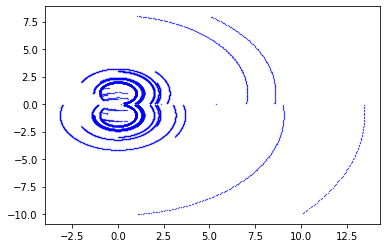

In [5]:
plt.scatter(data[:,0], data[:,1], c ="blue", s = 0.1)

In [6]:
X = data[:,0:2]
y = data[:,2]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(max_depth =100,criterion="entropy")
dTree = DTClassifier.fit(X_train, y_train)

In [9]:
from sklearn import tree
dotData = tree.export_graphviz(dTree, out_file=None)
print(dotData)

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= -0.041\nentropy = 1.0\nsamples = 7233\nvalue = [3683, 3550]"] ;
1 [label="X[0] <= 0.5\nentropy = 0.142\nsamples = 3689\nvalue = [3615, 74]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= -1.55\nentropy = 0.275\nsamples = 1561\nvalue = [1487, 74]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 1089\nvalue = [1089, 0]"] ;
2 -> 3 ;
4 [label="X[0] <= -0.86\nentropy = 0.627\nsamples = 472\nvalue = [398, 74]"] ;
2 -> 4 ;
5 [label="X[0] <= -0.904\nentropy = 0.055\nsamples = 316\nvalue = [314, 2]"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 291\nvalue = [291, 0]"] ;
5 -> 6 ;
7 [label="X[0] <= -0.901\nentropy = 0.402\nsamples = 25\nvalue = [23, 2]"] ;
5 -> 7 ;
8 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
7 -> 8 ;
9 [label="X[0] <= -0.888\nentropy = 0.25\nsamples = 24\nvalue = [23, 1]"] ;
7 -> 9 ;
10 [label="X[0] <= -0.893\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]"] ;
9 -> 10 ;
11 [label="en

In [10]:
dTree.predict([[-5,-1]])

array([-1.])

In [11]:
y_pred = dTree.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9939192924267551


In [12]:
def normalizer(data):
    data[:,0] = data[:,0] - data[:,2]
    data[:,1] = data[:,1] - data[:,3]
    
    data[:,2] = 0
    data[:,3] = 0
    
    tempX = numpy.multiply(data[:,0], numpy.cos(data[:,4])) + numpy.multiply(data[:,1], numpy.sin(data[:,4]))
    tempY = -numpy.multiply(data[:,0], numpy.sin(data[:,4])) + numpy.multiply(data[:,1], numpy.cos(data[:,4]))
    
    data[:,0] = tempX
    data[:,1] = tempY
    
    data[:,4] = 0
    
    data = data[:,[0,1]]
    
    return data

In [39]:
# defining initial conditions
xi = 0
yi = 0
xf = 5
yf = 3
ai = 0
v = 1

In [40]:
x = [xi]
y = [yi]
a = [ai]
dt = 0.01
us = []

#if inDubinsCircle(xf,yf):
#    classifier = inClf
#else:
#    classifier = outClf

classifier = dTree

while math.sqrt((xf - x[-1])**2 + (yf - y[-1])**2) > 0.1:
    sample = numpy.array([xf,yf,x[-1],y[-1],a[-1]]).reshape(1, -1)
    sample = normalizer(sample)
    
    u = classifier.predict(sample)
    us.append(u)
    a.append(a[-1] + dt*v*u[0])
    x.append(x[-1] + dt*v*math.cos(a[-2]))
    y.append(y[-1] + dt*v*math.sin(a[-2]))

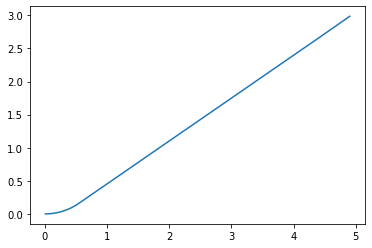

In [41]:
plt.plot(x[1:1950], y[1:1950])

In [38]:
us

[array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1.]),
 array([-1.]),
 array([1